<a href="https://colab.research.google.com/github/shiktr1785/isss-ai-python/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Metaheuristics for Traveling Salesman Problem
### Shikhar Mani Tripathi

The main objective of this assignment is to implement a metaheuristic algorithm in Python to solve the Traveling Salesman Problem (TSP). The TSP is an optimization problem that seeks to determine the most efficient route to visit each node exactly once and return to the starting point. This problem is recognized as a complex combinatorial challenge, as multiple solutions exist. Optimization involves analyzing all possible solutions that meet the constraints of the problem to identify the most optimal solution with the lowest resource cost.

>Metaheuristics are powerful tools for solving complex optimization problems, especially when traditional methods are infeasible or inefficient. Although they do not guarantee optimal solutions, they can often deliver high-quality solutions in a reasonable timeframe, making them invaluable in the industry. A key consideration in these algorithms is the trade-off between solution quality, computational cost, and parameter tuning.

For the Traveling Salesman Problem (TSP) optimization, there are four available options to choose from. In this case, I will be using a Genetic Algorithm to tackle the optimization challenge.


## Initial Setup

In [52]:
# @title Library Import
import numpy as np
import matplotlib.pyplot as plt # for plotting and visualisation

In [2]:
# @title Generate Random Cities
def generate_cities(n_cities, range_min=0, range_max=100):

  # Generate random city coordinates within a given range.
  return np.random.uniform(range_min, range_max, size=(n_cities, 2))

In [53]:
# @title Distance Calculation
def compute_distance_matrix(cities):

  # Compute the euclidian distance between the cities.

  n = len(cities)
  distance_matrix = np.zeros((n, n))

  for i in range(n):
    for j in range(i+1, n):
      dist = np.linalg.norm(cities[i] - cities[j])
      distance_matrix[i, j] = dist
      distance_matrix[j, i] = dist

  return distance_matrix

In [54]:
# @title Cost Evaluation
def evaluate_tour_cost(tour, distance_matrix):

  # Calculate the total cost for the distance of the tour.
  cost = 0

  for i in range(len(tour)):
    cost += distance_matrix[tour[i], tour[(i+1) % len(tour)]]
  return cost

## Genetic Algorithm

In [5]:
# @title Generating Initial Population

def generate_initial_population(pop_size, num_cities):

  population = []

  for _ in range(pop_size):
    tour = np.random.permutation(num_cities)
    population.append(tour)
  return population

In [6]:
# @title Fitness Evaluation

def evaluate_fitness(population, distance_matrix):

  fitness = []

  for tour in population:
    cost = evaluate_tour_cost(tour, distance_matrix)
    fitness.append(cost)
  return fitness

In [7]:
# @title Roulette Wheel Selection

def roulette_wheel_selection(population, fitness):

  # Selecting parent using roulette wheel selection
  fitness = np.array(fitness)
  probabilities = 1 / fitness
  probabilities /= probabilities.sum()

  # Select an individual based on probability
  selected_index = np.random.choice(len(population), p=probabilities)
  return population[selected_index]

In [8]:
# @title Tournament Selection

def tournament_selection(population, fitness, tournament_size=3):

  # Tournament selection
  tournament = np.random.choice(len(population), size=tournament_size, replace=False)
  tournament_fitness = [fitness[i] for i in tournament]

  best_index = tournament[np.argmin(tournament_fitness)]
  return population[best_index]

In [9]:
# @title Crossover Order

def crossover(parent1, parent2):

  # Crossover between 2 parents
  num_cities = len(parent1)
  child = [-1] * num_cities

  # Crossover point
  start, end = sorted(np.random.choice(num_cities, size=2, replace=False))
  child[start:end + 1] = parent1[start:end + 1]

  # Filling the remaining cities from parent2

  current_index = 0

  for city in parent2:
    if city not in child:
      while child[current_index] != -1:
        current_index += 1
      child[current_index] = city

  return child

In [10]:
# @title Mutation (Swap Mutation)

def mutation(tour, mutation_rate=0.1):

  while True:
    # Mutation with given rate
    mutated_tour = tour[:]

    for _ in range(int(len(tour) * mutation_rate)):
      i, j = np.random.choice(len(tour), size=2, replace=False)
      mutated_tour[i], mutated_tour[j] = mutated_tour[j], mutated_tour[i]

    # Check if the mutated tour is different from the original
    if not np.array_equal(mutated_tour, tour):
      return mutated_tour

In [49]:
# @title Main Loop: Genetic Algorithm

def genetic_algorithm(
    distance_matrix,
    num_cities,
    pop_size,
    generations,
    mutation_rate,
    verbose
):

  # Initilze Population and Evaluate Fitness
  population = generate_initial_population(pop_size, num_cities)
  fitness = evaluate_fitness(population, distance_matrix)

  best_fitness_per_generation = []
  all_population = []

  # Main Loop
  for generation in range(generations):
    new_population = []

    # Next Generation
    for _ in range(pop_size // 2):
      # Selection
      parent1 = roulette_wheel_selection(population, fitness)
      parent2 = tournament_selection(population, fitness)

      if verbose:
        print(f"Parent 1: {parent1}")
        print(f"Parent 2: {parent2}")

      # Crossover
      child1 = crossover(parent1, parent2)
      child2 = crossover(parent2, parent1)

      if verbose:
        print(f"Child 1: {child1}")
        print(f"Child 2: {child2}")

      # Mutation
      child1 = mutation(child1, mutation_rate)
      child2 = mutation(child2, mutation_rate)

      if verbose:
        print(f"Mutated Child 1: {child1}")
        print(f"Mutated Child 2: {child2}")

      new_population.extend([child1, child2])

      if verbose:
        print(f"New Population: {new_population}")

    # Evaluate new fitness
    population = new_population
    fitness = evaluate_fitness(population, distance_matrix)

    for index, value in enumerate(population):
      print(f"Population {index}: {value}")

    # Track fitness and population
    best_fitness_per_generation.append(min(fitness))
    all_population.append(population)

    # Print Progress
    best_fitness = min(fitness)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.2f}\n")

  # Find overall best solution
  overall_best_generation = np.argmin(best_fitness_per_generation)
  best_fitness = best_fitness_per_generation[overall_best_generation]
  best_population = all_population[overall_best_generation]

  best_index = np.argmin([evaluate_tour_cost(tour, distance_matrix) for tour in best_population])
  best_tour = best_population[best_index]

  return best_tour, best_fitness, best_fitness_per_generation, all_population

## Plot and Visualisation

In [12]:
def plot_cities_and_tour(cities, tour):

  # Visualise cities and optional tour path

  plt.figure(figsize=(10,6))
  plt.scatter(cities[:, 0], cities[:, 1], color='blue', label='Cities')

  # Add labels to cities
  for i, (x, y) in enumerate(cities):
      plt.text(x, y, str(i), fontsize=12, color='red', ha='right', va='bottom')

  # If a tour is provided, plot the path
  if tour is not None:
    for i in range(len(tour) - 1):
      plt.plot([cities[tour[i], 0], cities[tour[i+1], 0]],
              [cities[tour[i], 1], cities[tour[i+1], 1]],
              color='cyan', linestyle='-', linewidth=2)

      # Add return to starting city

      plt.plot([cities[tour[-1]][0], cities[tour[0]][0]],
              [cities[tour[-1]][1], cities[tour[0]][1]],
              color='orange', linestyle='-', linewidth=2)

  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("TSP Cities and Optional Tour")
  plt.grid()
  plt.show()

## Driver Function

City 0: [20.56523806 32.71776459]
City 1: [68.92359287 81.1001773 ]
City 2: [11.89894276 95.15735344]
City 3: [40.92569123 86.88086802]
City 4: [80.05529679 94.71396488]
City 5: [14.03864708 43.67832168]
City 6: [60.21845932 61.86425091]
City 7: [32.74118794  1.28033188]
City 8: [ 7.36907065 10.17482195]
City 9: [65.42153785 21.01227627]

Distance Matrix:
 [[  0.          68.40605484  63.0381387   57.86354489  85.92203407
   12.75657484  49.21275873  33.7129935   26.12131499  46.35845217]
 [ 68.40605484   0.          58.7317199   28.58843965  17.58550666
   66.42855223  21.11398148  87.63774386  93.91147553  60.18986824]
 [ 63.0381387   58.7317199    0.          30.18364355  68.15779625
   51.52348053  58.6788408   96.16285334  85.10317503  91.44485035]
 [ 57.86354489  28.58843965  30.18364355   0.          39.90593237
   50.88588364  31.59180325  85.99091744  83.7249323   70.27601213]
 [ 85.92203407  17.58550666  68.15779625  39.90593237   0.
   83.44360321  38.37452057 104.73045723 1

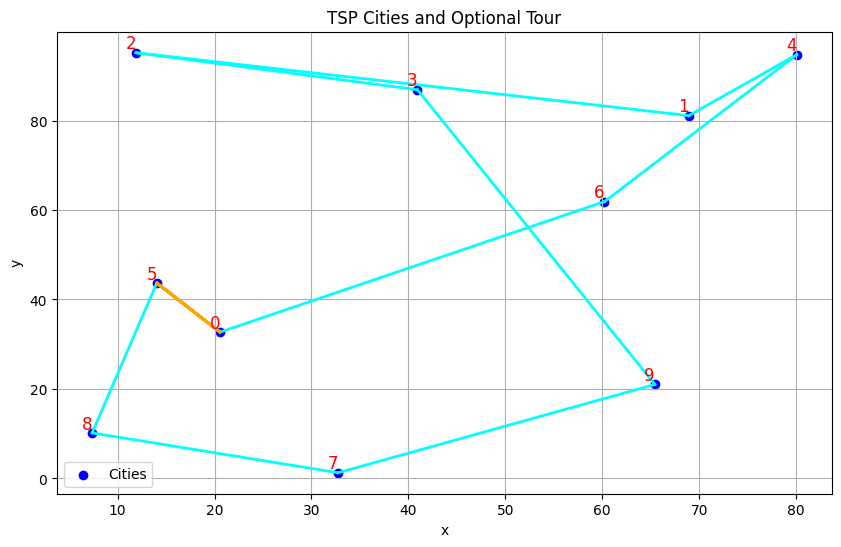

Results saved to genetic_algorithm_output.txt


In [51]:
# @title Genetic TSP

if __name__ == "__main__":

  # Generate Cities
  cities = generate_cities(10)
  for index, value in enumerate(cities):
    print(f"City {index}: {value}")

  # Compute distance matrix
  distance_matrix = compute_distance_matrix(cities)
  print("\nDistance Matrix:\n", distance_matrix, "\n")

  # Parameters
  pop_size = 20 # @param {"type":"integer","placeholder":"popsize"}
  generations = 50 # @param {"type":"integer","placeholder":"generations"}
  mutation_rate = 0.1 # @param {"tpye":"float","placeholder":"mutationrate"}
  num_cities = len(cities)
  verbose = False # @param {"type":"boolean"}

  '''def genetic_algorithm(
    distance_matrix,
    num_cities,
    pop_size,
    generations,
    mutation_rate),
    verbose
    '''

  best_tour, best_cost, best_fitness_per_generation, all_population = genetic_algorithm(distance_matrix,
                                                                        num_cities,
                                                                        pop_size,
                                                                        generations,
                                                                        mutation_rate,
                                                                        verbose)
  print("\nBest Solution Found:")
  print(f"Tour: {best_tour}\n")
  print(f"Cost: {best_cost:.2f}\n")
  print(f"Level: {np.argmin(best_fitness_per_generation)}\n")
  plot_cities_and_tour(cities, best_tour)

  # Prepare the output
  output = f"""
  Best Solution Found:
  Tour: {best_tour}
  Cost: {best_cost:.2f}
  Level: {np.argmin(best_fitness_per_generation)}
  """

  # Save to a text file
  output_file = "genetic_algorithm_output.txt"
  with open(output_file, "w") as file:
      file.write(output)

  print(f"Results saved to {output_file}")

282.5185154609731


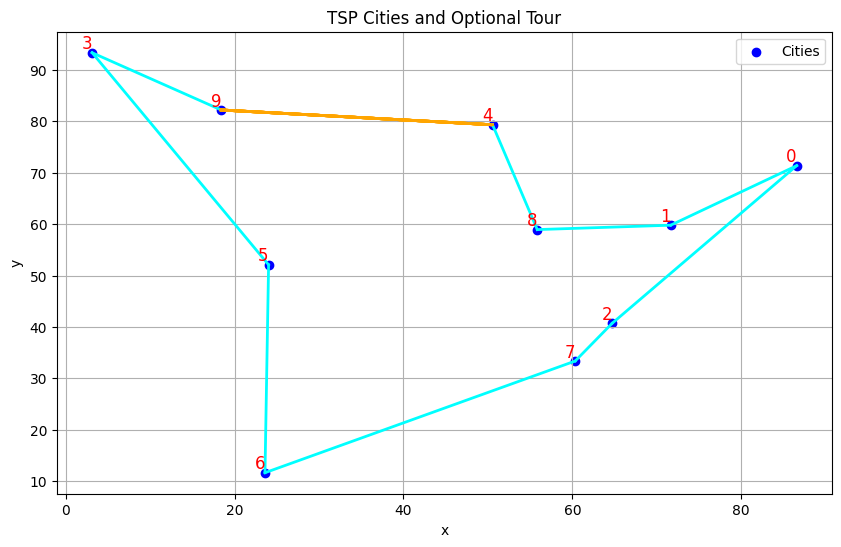

In [33]:
tour= [9, 3, 5, 6, 7, 2, 0, 1, 8, 4]
print(evaluate_tour_cost(tour, distance_matrix))
plot_cities_and_tour(cities, tour)